In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [74]:
cars_df = pd.read_csv("D:\\dataFrames\\vehicles.csv")

In [75]:
cars_df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


lets check what columns we have

In [76]:
cars_df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

first we will remove the url's, and the Unnamed columns as they probably wont help us guessing the price

In [77]:
cars_df = cars_df.drop(columns = ["Unnamed: 0","url","region_url","image_url"])

In [78]:
cars_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,...,1G1YU3DW1A5106980,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,...,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,...,NaN,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,...,NaN,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,...,NaN,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [79]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   region        458213 non-null  object 
 2   price         458213 non-null  int64  
 3   year          457163 non-null  float64
 4   manufacturer  439993 non-null  object 
 5   model         453367 non-null  object 
 6   condition     265273 non-null  object 
 7   cylinders     287073 non-null  object 
 8   fuel          454976 non-null  object 
 9   odometer      402910 non-null  float64
 10  title_status  455636 non-null  object 
 11  transmission  455771 non-null  object 
 12  VIN           270664 non-null  object 
 13  drive         324025 non-null  object 
 14  size          136865 non-null  object 
 15  type          345475 non-null  object 
 16  paint_color   317370 non-null  object 
 17  description   458143 non-null  object 
 18  stat

as we see we have some null values, lets check how much we have in each column

In [80]:
cars_df.isnull().sum()

id                   0
region               0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

as we can see, we have 458213 rows, but only 133620 unique VIN numbers, which means we have a lot of duplicates, so we will remove duplicates based on the VIN of the car

In [81]:
cars_df.VIN.nunique()

133620

In [82]:
cars_df = cars_df.drop_duplicates(subset = 'VIN',keep = 'first')

In [83]:
cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,...,1G1YU3DW1A5106980,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,...,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,...,NaN,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
5,7239776805,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,...,3TMAZ5CN6GM020355,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-01T07:27:25-0600
6,7239425036,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,...,1ZVBP8JS8C5240016,rwd,NaN,coupe,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-30T13:34:00-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458162,7240952591,milwaukee,46000,2009.0,NaN,3200,excellent,NaN,diesel,30526.0,...,1HVBTAAN19H107230,NaN,full-size,bus,white,2009 International bus with 36 seats four whee...,wi,43.149700,-88.163900,2020-12-03T08:43:58-0600
458195,7240981040,sheboygan,20488,2010.0,gmc,sierra 1500,excellent,8 cylinders,gas,63812.0,...,3GTRKWE36AG215287,4wd,mid-size,truck,black,big> 2010 GMC Sierra 1500 SLT - Carbon Black M...,wi,44.078180,-87.696800,2020-12-03T09:34:37-0600
458202,7240989873,wausau,4995,2005.0,buick,rendezvous cx,good,6 cylinders,gas,137962.0,...,3G5DB03E05S549305,fwd,compact,SUV,grey,2005 Buick Rendezvous CX. 3.4 V6. Need that ...,wi,44.631225,-90.022076,2020-12-03T09:48:38-0600
458204,7240975107,wausau,4495,2006.0,buick,lacrosse cx,good,6 cylinders,gas,121488.0,...,2G4WC582161287362,fwd,mid-size,sedan,black,"2006 Buick Lacrosse, CX 3.8 V6, 1 owner, clean...",wi,44.631225,-90.022076,2020-12-03T09:24:54-0600


after we dropped the duplicates, we can strt analsing the missing data

as we can see we have a lot of missing values, and we will try to figure out what do with it

first, for the size column, the one with the most null values, maybe we the size can be determing based on the model of the car, so we can drop it, as it is pretty useless any way with more the 70% missing values, we can also drop the id and VIN columns, as it is unique for each car

In [84]:
cars_df.isnull().sum()

id                  0
region              0
price               0
year              585
manufacturer     3330
model             564
condition       61363
cylinders       49294
fuel             1800
odometer         3350
title_status     1460
transmission     1269
VIN                 1
drive           29059
size            95877
type            18427
paint_color     31944
description        42
state               0
lat              1421
long             1421
posting_date        0
dtype: int64

In [85]:
cars_df = cars_df.drop(columns = ['size','id','VIN'])

In [86]:
cars_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
5,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-01T07:27:25-0600
6,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-30T13:34:00-0600


In [87]:
cars_df.isnull().sum()

region              0
price               0
year              585
manufacturer     3330
model             564
condition       61363
cylinders       49294
fuel             1800
odometer         3350
title_status     1460
transmission     1269
drive           29059
type            18427
paint_color     31944
description        42
state               0
lat              1421
long             1421
posting_date        0
dtype: int64

for the year column, as it has only 585 missing values, which is only 0.4% of the cars, we will drop these, we will also drop the ones with no model, no transmision data, and no fuel data

In [88]:
df = cars_df.dropna(subset=['year', 'model','fuel','transmission'])

In [89]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer     2634
model               0
condition       57998
cylinders       47282
fuel                0
odometer         2911
title_status      689
transmission        0
drive           27790
type            17712
paint_color     30764
description        42
state               0
lat              1408
long             1408
posting_date        0
dtype: int64

In [90]:
drive_type = df.groupby(by = 'drive')

In [91]:
drive_type.describe()

price                                                                \
         count          mean            std  min      25%      50%       75%   
drive                                                                          
4wd    42412.0  19475.643992   23285.379760  0.0  7938.25  16500.0  28886.25   
fwd    44277.0  10228.366579  104754.898702  0.0  4700.00   8900.0  13995.00   
rwd    15467.0  16924.010733   17509.582002  0.0  6725.00  13995.0  23676.50   

                      year               ...        lat                long  \
              max    count         mean  ...        75%        max    count   
drive                                    ...                                  
4wd     3429900.0  42412.0  2012.950203  ...  44.083993  64.993698  41843.0   
fwd    22000000.0  44277.0  2012.912076  ...  42.142257  64.837800  43857.0   
rwd      875995.0  15467.0  2009.016034  ...  40.328000  64.822837  15313.0   

                                                                           \
            mean        std         min         25%        50%        75%   
drive                                                                       
4wd   -98.243989  19.603766 -159.384676 -117.362569 -93.581290 -82.319231   
fwd   -97.338297  19.154330 -159.713745 -116.931300 -92.324974 -82.349524   
rwd   -97.825293  18.626075 -159.365637 -117.112800 -93.581290 -82.450000   

                  
             max  
drive             
4wd    94.163200  
fwd    94.163200  
rwd   -69.201101  

[3 rows x 40 columns]

as we can see, the type of drive the car has (rwd, fwd, 4wd) changes the price, so we will change it to unknown, since we cant just drop it,the columns itself or the rows that have a null in drive

In [92]:
df = df.fillna(value = {'drive':'unknown'})

In [93]:
drive_type = df.groupby(by = 'drive')
drive_type.describe()

price                                                      \
           count          mean            std  min      25%      50%   
drive                                                                  
4wd      42412.0  19475.643992   23285.379760  0.0  7938.25  16500.0   
fwd      44277.0  10228.366579  104754.898702  0.0  4700.00   8900.0   
rwd      15467.0  16924.010733   17509.582002  0.0  6725.00  13995.0   
unknown  27790.0  15126.252861   15283.200351  0.0  5495.00  12327.5   

                                  year               ...        lat  \
              75%         max    count         mean  ...        75%   
drive                                                ...              
4wd      28886.25   3429900.0  42412.0  2012.950203  ...  44.083993   
fwd      13995.00  22000000.0  44277.0  2012.912076  ...  42.142257   
rwd      23676.50    875995.0  15467.0  2009.016034  ...  40.328000   
unknown  21306.75    625000.0  27790.0  2012.703850  ...  41.636659   

                       long                                                \
               max    count       mean        std         min         25%   
drive                                                                       
4wd      64.993698  41843.0 -98.243989  19.603766 -159.384676 -117.362569   
fwd      64.837800  43857.0 -97.338297  19.154330 -159.713745 -116.931300   
rwd      64.822837  15313.0 -97.825293  18.626075 -159.365637 -117.112800   
unknown  64.822837  27525.0 -94.752905  18.745767 -159.530300 -112.452574   

                                          
               50%        75%        max  
drive                                     
4wd     -93.581290 -82.319231  94.163200  
fwd     -92.324974 -82.349524  94.163200  
rwd     -93.581290 -82.450000 -69.201101  
unknown -88.169000 -79.957520  36.082260  

[4 rows x 40 columns]

In [94]:
df = df.dropna(subset=['manufacturer'])

since the manufacturer column is importent to us, but has 2634 null values, which is 2% of our data, we will drop those with an unknown manufacturer

In [95]:
df.shape

(127312, 19)

In [96]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition       57196
cylinders       46348
fuel                0
odometer         2798
title_status      679
transmission        0
drive               0
type            17093
paint_color     30204
description        42
state               0
lat              1369
long             1369
posting_date        0
dtype: int64

In [97]:
condition = df.groupby(by = "condition")
condition.describe()

price                                                        \
             count          mean            std    min      25%      50%   
condition                                                                  
excellent  37136.0  13220.446252   11449.283902    0.0  5995.00  10495.0   
fair         898.0   3857.648107    6490.597358    0.0  1500.00   2500.0   
good       26419.0  14972.955676  135776.581134    0.0  5499.00  10999.0   
like new    5178.0  17743.583623   15844.514887    0.0  7995.00  14850.0   
new          394.0  21923.497462   21551.255166    0.0  6987.25  18261.5   
salvage       91.0   3034.978022    2986.149010  100.0   974.50   2000.0   

                                    year               ...        lat  \
                75%         max    count         mean  ...        75%   
condition                                              ...              
excellent  17500.00    204900.0  37136.0  2011.779082  ...  42.267453   
fair        4493.75    123456.0    898.0  2000.988864  ...  42.498100   
good       19985.50  22000000.0  26419.0  2011.630228  ...  41.686200   
like new   23466.00    249911.0   5178.0  2013.330243  ...  42.084260   
new        29000.00    198750.0    394.0  2015.885787  ...  42.605926   
salvage     3850.00     13500.0     91.0  2002.912088  ...  41.629098   

                         long                                                 \
                 max    count        mean        std         min         25%   
condition                                                                      
excellent  64.993698  36395.0  -95.329807  18.101510 -159.713745 -110.991568   
fair       61.206000    897.0  -92.476545  17.279403 -159.344800 -104.963100   
good       64.823924  26247.0  -94.022402  16.764572 -159.530300 -106.393541   
like new   61.166353   5176.0  -92.901194  18.421339 -157.897735 -106.521657   
new        48.937200    394.0  -92.281237  17.460041 -156.467740 -106.380887   
salvage    47.956456     91.0 -100.676393  16.675045 -157.836157 -116.899488   

                                            
                 50%        75%        max  
condition                                   
excellent -90.959059 -81.404223 -67.840490  
fair      -86.487100 -78.859900 -69.680500  
good      -88.527910 -82.119068  94.163200  
like new  -85.961050 -79.018532 -67.840490  
new       -87.036779 -77.046763 -71.102082  
salvage   -97.784154 -85.944437 -73.200000  

[6 rows x 40 columns]

with the condition column, we will also place unknown, and also with the cylinders

In [98]:
df = df.fillna(value = {'condition':'unknown','cylinders':'unknown'})

In [99]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         2798
title_status      679
transmission        0
drive               0
type            17093
paint_color     30204
description        42
state               0
lat              1369
long             1369
posting_date        0
dtype: int64

for the odometer missing values, it represents only 2% of our data, so i will drop those with a missing values, and also the same with title_status, lat and long missing

In [100]:
df = df.dropna(subset=['odometer','title_status','long','lat'])

In [101]:
df.isnull().sum()

region              0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type            16081
paint_color     28541
description        42
state               0
lat                 0
long                0
posting_date        0
dtype: int64

In [102]:
type_car = df.groupby(by = 'type')
type_car.describe()

price                                                      \
               count          mean            std  min      25%      50%   
type                                                                       
SUV          28595.0  14844.869767   24710.020658  0.0   6493.0  12795.0   
bus             55.0  17185.709091   17634.362279  0.0   7174.5  10500.0   
convertible   1803.0  18761.391570   22415.155470  0.0   6998.0  13995.0   
coupe         4469.0  18035.541732   19067.135550  0.0   5975.0  13991.0   
hatchback     5564.0  10746.945902    8276.873836  0.0   5500.0   9500.0   
mini-van      1971.0  10017.599696    8194.513749  0.0   4499.5   7995.0   
offroad         89.0  22630.696629   23408.656600  0.0   8000.0  17995.0   
other         6392.0  17466.625939   13964.242195  0.0   6995.0  15907.5   
pickup        9523.0  23525.411530   15692.515956  0.0  11499.0  22990.0   
sedan        31626.0  10417.677417    8842.841545  0.0   4771.0   8990.0   
truck         9322.0  24752.259279  228260.143979  0.0   8995.0  20000.0   
van           2958.0  14119.134888   11860.503810  0.0   5999.0  12995.0   
wagon         4034.0  11654.212940    8747.463736  0.0   5995.0   9999.5   

                                      year               ...        lat  \
                  75%         max    count         mean  ...        75%   
type                                                     ...              
SUV          19999.00   3429900.0  28595.0  2012.914111  ...  43.036362   
bus          21450.00    114900.0     55.0  2010.236364  ...  42.388902   
convertible  22995.00    325000.0   1803.0  2005.767055  ...  41.050800   
coupe        24900.00    235000.0   4469.0  2009.582457  ...  41.087567   
hatchback    14990.00    124995.0   5564.0  2013.704170  ...  42.012347   
mini-van     13900.00     71019.0   1971.0  2011.476408  ...  42.675374   
offroad      29995.00    189998.0     89.0  2006.786517  ...  41.567394   
other        25590.00    149995.0   6392.0  2013.382979  ...  40.854584   
pickup       33403.00    123456.0   9523.0  2012.724667  ...  42.224548   
sedan        14498.75    199996.0  31626.0  2012.721495  ...  42.220000   
truck        33926.00  22000000.0   9322.0  2012.643639  ...  44.354923   
van          18990.75    159999.0   2958.0  2012.735970  ...  42.208540   
wagon        15990.00    179500.0   4034.0  2012.218889  ...  42.925104   

                           long                                     \
                   max    count        mean        std         min   
type                                                                 
SUV          64.859100  28595.0  -97.754470  19.738487 -159.713745   
bus          48.797400     55.0  -89.920001  16.716347 -157.837158   
convertible  64.822837   1803.0  -96.497296  19.017593 -158.030906   
coupe        64.822837   4469.0  -97.176012  18.779415 -158.030906   
hatchback    64.822837   5564.0  -97.944189  19.214589 -159.365616   
mini-van     64.815520   1971.0  -94.807281  18.857492 -158.030906   
offroad      61.166252     89.0 -105.314261  20.897883 -149.857916   
other        64.837800   6392.0  -94.995945  17.541543 -159.344800   
pickup       64.847187   9523.0  -97.185259  18.477228 -159.365573   
sedan        64.847187  31626.0  -97.166052  19.916317 -159.376056   
truck        64.993698   9322.0 -100.179947  18.417460 -159.376056   
van          64.815520   2958.0  -95.102651  18.470962 -159.376056   
wagon        64.847187   4034.0  -96.695606  20.143166 -159.376056   

                                                           
                    25%         50%        75%        max  
type                                                       
SUV         -117.015100  -93.194841 -82.351490  94.163200  
bus          -96.810817  -84.480743 -76.909471 -71.683820  
convertible -116.359028  -88.953900 -81.695950 -68.727558  
coupe       -117.137551  -92.114400 -81.766548 -68.766355  
hatchback   -117.218613  -93.142285 -82.318668 -68.79180

as we can see, the type of the car matters , so all of those with a missing type will be classified as unknown, and we will do the same with the color

In [103]:
df = df.fillna(value = {'type':'unknown','paint_color':'unknown'})

In [104]:
df.isnull().sum()

region           0
price            0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
description     42
state            0
lat              0
long             0
posting_date     0
dtype: int64

i will drop the descripiton, long and lat columns as those wont help us determine the price, and we know where the cars is (in regards to the long and lat columns)

In [105]:
df = df.drop(columns = ['description','long','lat'])

In [106]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122482 entries, 0 to 458211
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        122482 non-null  object 
 1   price         122482 non-null  int64  
 2   year          122482 non-null  float64
 3   manufacturer  122482 non-null  object 
 4   model         122482 non-null  object 
 5   condition     122482 non-null  object 
 6   cylinders     122482 non-null  object 
 7   fuel          122482 non-null  object 
 8   odometer      122482 non-null  float64
 9   title_status  122482 non-null  object 
 10  transmission  122482 non-null  object 
 11  drive         122482 non-null  object 
 12  type          122482 non-null  object 
 13  paint_color   122482 non-null  object 
 14  state         122482 non-null  object 
 15  posting_date  122482 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 15.9+ MB


lastly we will drop the region, state, posting_date columns

In [108]:
df.reset_index(inplace = True)

In [109]:
df = df.drop(columns = 'index')

In [110]:
df = df.drop(columns = ['region','posting_date','state'])

In [111]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,other,unknown
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,sedan,unknown
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,unknown,SUV,blue
3,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,unknown,pickup,red
4,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue


In [40]:
df.loc[df['price'] == 0]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
15,0,2016.0,chevrolet,silverado 1500 lt z71,unknown,8 cylinders,other,29458.0,missing,automatic,4wd,truck,white
464,0,2016.0,toyota,tundra,unknown,unknown,gas,134918.0,clean,automatic,unknown,unknown,black
465,0,2017.0,chevrolet,silverado 1500,unknown,unknown,gas,0.0,clean,automatic,unknown,unknown,white
711,0,2019.0,chevrolet,tahoe,unknown,unknown,gas,40659.0,clean,automatic,4wd,unknown,black
1204,0,2004.0,toyota,sienna,unknown,6 cylinders,gas,270345.0,clean,automatic,fwd,mini-van,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122403,0,2016.0,ford,f-150 xlt,unknown,6 cylinders,gas,17828.0,clean,automatic,4wd,unknown,unknown
122404,0,2018.0,buick,enclave essence,unknown,unknown,gas,46065.0,clean,automatic,fwd,SUV,unknown
122422,0,2013.0,ford,edge sel,unknown,6 cylinders,gas,152510.0,clean,automatic,4wd,SUV,unknown
122472,0,2015.0,chrysler,300,excellent,unknown,gas,27911.0,clean,automatic,4wd,sedan,unknown


we will remove all the cars with 0 price, since the model wont guess it and it would just throw it off

In [112]:
df = df.loc[df['price'] !=0 ]

In [113]:
df.price.max()

22000000

In [114]:
df.loc[df['price'] == 22000000 ]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
54394,22000000,2015.0,toyota,tacoma,good,6 cylinders,gas,71000.0,clean,automatic,fwd,truck,white


In [115]:
df.loc[df['model'] == 'tacoma']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
242,12250,2001.0,toyota,tacoma,good,4 cylinders,gas,141443.0,clean,automatic,rwd,truck,silver
255,15980,2006.0,toyota,tacoma,good,6 cylinders,gas,178957.0,clean,automatic,rwd,truck,silver
285,10850,2008.0,toyota,tacoma,good,4 cylinders,gas,81018.0,clean,other,rwd,truck,white
291,22500,2011.0,toyota,tacoma,good,6 cylinders,gas,109234.0,clean,automatic,4wd,truck,grey
310,23900,2015.0,toyota,tacoma,good,6 cylinders,gas,158045.0,clean,automatic,4wd,truck,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121951,29997,2015.0,toyota,tacoma,unknown,unknown,gas,57299.0,clean,automatic,4wd,unknown,black
121970,33052,2017.0,toyota,tacoma,unknown,unknown,gas,29984.0,clean,automatic,4wd,unknown,silver
121975,31750,2017.0,toyota,tacoma,unknown,unknown,gas,60136.0,clean,automatic,unknown,unknown,red
122084,25995,2014.0,toyota,tacoma,unknown,unknown,other,115755.0,clean,automatic,4wd,pickup,black


i will remove the car with the 22000000 dollar price because as we see we have 700 cars like this at a much lower price

In [116]:
df = df.loc[df['price'] != 22000000]

In [117]:
df.loc[df['price'] == 22000000 ]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color


In [118]:
df.price.max()

3429900

In [119]:
df.loc[df['price'] == 3429900]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
34132,3429900,2017.0,jeep,wrangler unlimited,unknown,6 cylinders,gas,16695.0,clean,automatic,4wd,SUV,black


In [120]:
df.loc[df['model'] == 'wrangler unlimited']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
216,22500,2011.0,jeep,wrangler unlimited,unknown,6 cylinders,gas,103678.0,clean,automatic,rwd,SUV,unknown
1219,29995,2016.0,jeep,wrangler unlimited,good,6 cylinders,gas,79907.0,clean,automatic,4wd,SUV,black
1980,28982,2016.0,jeep,wrangler unlimited,unknown,6 cylinders,gas,65724.0,clean,automatic,4wd,SUV,silver
2007,13950,2007.0,jeep,wrangler unlimited,excellent,8 cylinders,gas,145664.0,clean,manual,4wd,SUV,black
2782,22288,2012.0,jeep,wrangler unlimited,excellent,6 cylinders,gas,78545.0,clean,automatic,4wd,SUV,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120842,35777,2020.0,jeep,wrangler unlimited,unknown,unknown,gas,20651.0,clean,automatic,4wd,unknown,unknown
120885,38991,2019.0,jeep,wrangler unlimited,unknown,unknown,gas,35200.0,clean,automatic,4wd,unknown,unknown
121297,28395,2015.0,jeep,wrangler unlimited,unknown,unknown,gas,48694.0,clean,automatic,4wd,unknown,green
122250,16995,2013.0,jeep,wrangler unlimited,excellent,6 cylinders,gas,141386.0,clean,automatic,4wd,SUV,white


as with the previous car, i will also remove this outlier

In [121]:
df = df.loc[df['price'] != 3429900]

In [122]:
df.price.max()

999000

In [123]:
df.loc[df['price'] == 999000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
30419,999000,2017.0,mercedes-benz,amg g 63,unknown,8 cylinders,gas,4085.0,clean,automatic,4wd,SUV,white


In [124]:
df.loc[df['model'] == 'amg g 63']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
30419,999000,2017.0,mercedes-benz,amg g 63,unknown,8 cylinders,gas,4085.0,clean,automatic,4wd,SUV,white
103501,189995,2019.0,mercedes-benz,amg g 63,unknown,8 cylinders,gas,5340.0,clean,automatic,4wd,SUV,white


beacuse removing the max price of this car will leave only 1 car of this model, i will remove this model

In [125]:
df = df.loc[df['model'] != 'amg g 63']

In [126]:
df.price.max()

875995

In [127]:
df.loc[df['price'] == 875995]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
108536,875995,2011.0,chevrolet,tahoe,unknown,8 cylinders,gas,150315.0,clean,automatic,rwd,SUV,silver


In [128]:
df.loc[df['model'] == 'tahoe']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
236,14980,2008.0,chevrolet,tahoe,good,8 cylinders,gas,134982.0,clean,automatic,4wd,SUV,black
247,16980,2008.0,chevrolet,tahoe,good,8 cylinders,gas,119582.0,clean,automatic,rwd,SUV,blue
502,8600,2003.0,chevrolet,tahoe,good,8 cylinders,gas,223152.0,clean,automatic,4wd,SUV,white
505,5300,2004.0,chevrolet,tahoe,good,8 cylinders,gas,293100.0,clean,automatic,4wd,SUV,white
575,31995,2018.0,chevrolet,tahoe,unknown,unknown,gas,105826.0,clean,automatic,4wd,unknown,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121111,15500,2009.0,chevrolet,tahoe,unknown,8 cylinders,gas,130056.0,clean,automatic,4wd,SUV,red
121502,38950,2016.0,chevrolet,tahoe,excellent,unknown,gas,80111.0,clean,automatic,4wd,SUV,black
122103,32995,2015.0,chevrolet,tahoe,unknown,unknown,other,103349.0,clean,automatic,unknown,other,black
122177,39995,2018.0,chevrolet,tahoe,excellent,8 cylinders,gas,65914.0,clean,automatic,rwd,SUV,silver


In [129]:
df = df.loc[df['price'] != 875995]

In [130]:
df.price.max()

625000

In [131]:
df.loc[df['price'] == 625000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
58204,625000,2020.0,ferrari,488 pista spider,unknown,unknown,gas,70.0,clean,manual,unknown,unknown,silver


In [132]:
df.loc[df['model'] == '488 pista spider']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
58204,625000,2020.0,ferrari,488 pista spider,unknown,unknown,gas,70.0,clean,manual,unknown,unknown,silver


In [133]:
df.price.sort_values(ascending = False)

58204     625000
58101     389500
58192     325000
18584     285888
58134     259000
           ...  
29405          1
30464          1
30536          1
30537          1
101763         1
Name: price, Length: 110972, dtype: int64

In [134]:
df.loc[df['price'] >= 259000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
18584,285888,2017.0,ferrari,488 spider,unknown,8 cylinders,gas,2862.0,clean,automatic,rwd,convertible,red
58101,389500,1972.0,ferrari,246 gt dino,unknown,unknown,gas,48998.0,clean,manual,unknown,unknown,silver
58134,259000,2017.0,ferrari,488 spider,unknown,unknown,gas,9910.0,clean,automatic,rwd,convertible,unknown
58192,325000,2019.0,ferrari,488 spider,unknown,unknown,gas,684.0,clean,automatic,rwd,convertible,unknown
58204,625000,2020.0,ferrari,488 pista spider,unknown,unknown,gas,70.0,clean,manual,unknown,unknown,silver


as we see all the expensive cars are from the same model and manufacturer, so i will leave them, now lets check the bottom outliers

In [135]:
df.loc[df['price'] <= 1000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
7,490,2019.0,ford,transit connect wagon xlt,excellent,4 cylinders,gas,4775.0,clean,automatic,unknown,van,unknown
90,1000,2003.0,toyota,corolla,unknown,4 cylinders,gas,130000.0,clean,automatic,fwd,sedan,silver
115,800,1976.0,chevrolet,nova,unknown,6 cylinders,gas,123000.0,missing,automatic,rwd,sedan,yellow
1641,800,1999.0,mercedes-benz,benz,good,8 cylinders,gas,94134.0,clean,automatic,fwd,sedan,silver
1724,1000,2013.0,dodge,grand caravan,like new,6 cylinders,gas,68971.0,clean,automatic,rwd,van,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121945,600,2002.0,subaru,impreza,fair,unknown,gas,93894.0,clean,automatic,unknown,unknown,blue
121947,234,2018.0,honda,hr-v lx,good,unknown,other,31039.0,clean,automatic,fwd,hatchback,blue
122230,500,2014.0,nissan,altima,excellent,4 cylinders,gas,81807.0,clean,automatic,fwd,unknown,unknown
122419,270,2016.0,nissan,370z touring,unknown,unknown,gas,43474.0,clean,automatic,rwd,coupe,unknown


as we can see we have only 3700 of those, and some cars are new so i will remove those cars to not throw off our model

In [136]:
df = df.loc[df['price'] > 1000]

In [137]:
less_the_100 = df.loc[df['price'] < 100000]

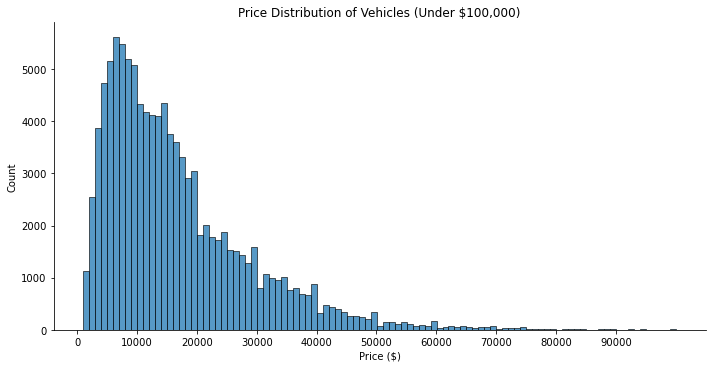

In [138]:
sns.displot(less_the_100, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000, 10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of Vehicles (Under $100,000)')
plt.show()

In [139]:
more_then_100 =  df.loc[df['price'] > 100000]

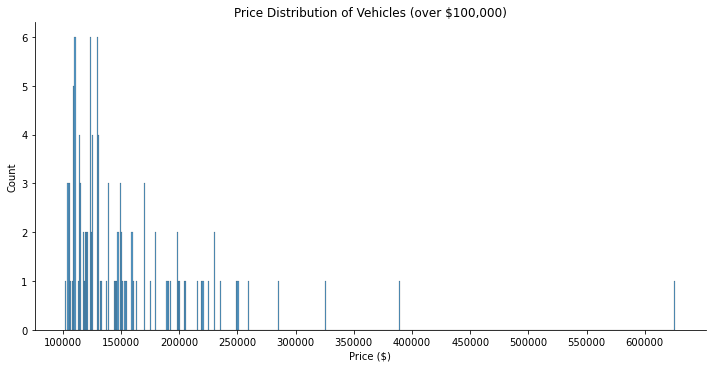

In [140]:
sns.displot(more_then_100, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(100000,more_then_100.price.max(), 50000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of Vehicles (over $100,000)')
plt.show()

as we can see from the distribution, there are not a lot of cars above 100K, and only 5 cars above 250K, so we will remove those 3 cars

In [141]:
df = df.loc[df['price']< 250000]

now lets check the price according to the most common car types

In [142]:
type_car = df.groupby(by = 'type')

In [143]:
type_car.describe().price

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
SUV,25071.0,16699.621914,11303.185415,1052.0,8650.00,14295.0,21950.0,225666.0
bus,53.0,17834.226415,17639.243796,3000.0,7800.00,14850.0,22900.0,114900.0
convertible,1658.0,19869.194210,19514.840989,1070.0,8761.25,14996.0,23995.0,219500.0
coupe,3958.0,20351.828954,19067.393859,1050.0,8200.00,15995.0,26483.5,235000.0
hatchback,4898.0,12200.742752,7756.280028,1100.0,6950.00,10850.5,15990.0,124995.0
mini-van,1824.0,10817.043860,7999.049454,1100.0,5399.75,8925.0,13999.0,71019.0
offroad,85.0,23689.600000,23426.715870,1500.0,8975.00,19000.0,30000.0,189998.0
other,5457.0,20447.700935,12947.894296,1162.0,10950.00,17950.0,27590.0,149995.0
pickup,8602.0,26037.981748,14399.227501,1100.0,14995.00,24995.0,34977.0,123456.0


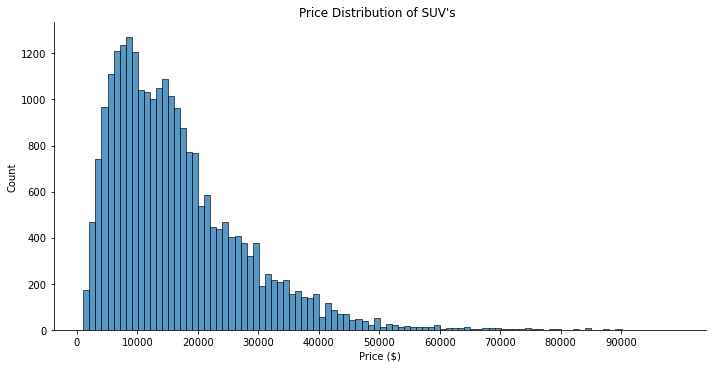

In [144]:
suv = df.loc[(df['type'] == 'SUV') & (df['price'] < 100000)]
sns.displot(suv, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000,10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of SUV\'s ')
plt.show()

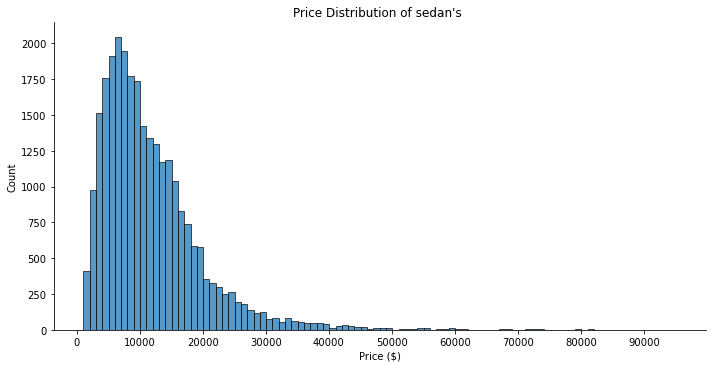

In [145]:
sedan= df.loc[(df['type'] == 'sedan') & (df['price'] < 100000)]
sns.displot(sedan, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000, 10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of sedan\'s ')
plt.show()

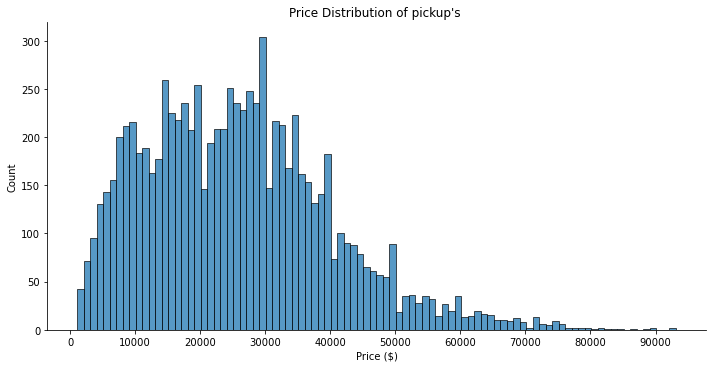

In [146]:
pickup= df.loc[(df['type'] == 'pickup') & (df['price'] < 100000)]
sns.displot(pickup, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000, 10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of pickup\'s ')
plt.show()

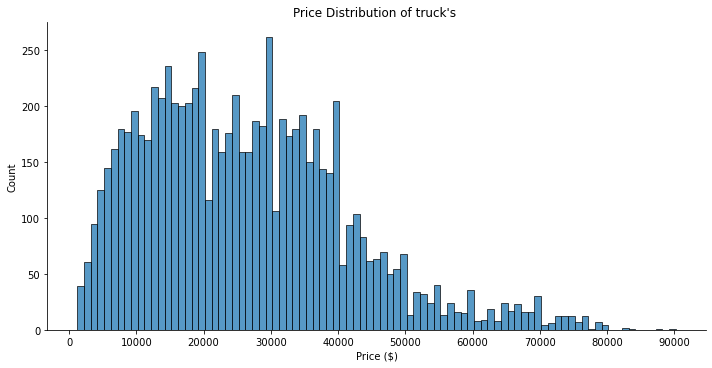

In [147]:
truck = df.loc[(df['type'] == 'truck') & (df['price'] < 100000)]
sns.displot(truck, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000, 10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of truck\'s ')
plt.show()

lets see the distribution of the types 

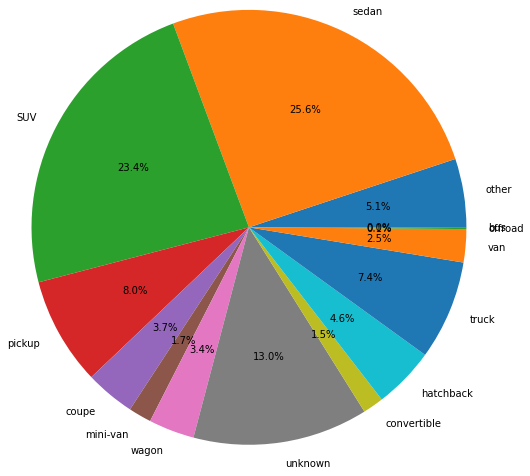

In [148]:
labels = df['type'].unique()
values = []
for label in labels:
    values.append(df.loc[df['type'] == label].shape[0])
plt.pie(values, labels = labels, shadow =False, radius = 2.5,autopct='%1.1f%%');

as we see, the bus and offroad cars are a very small part of the cars, so i will drop those cars

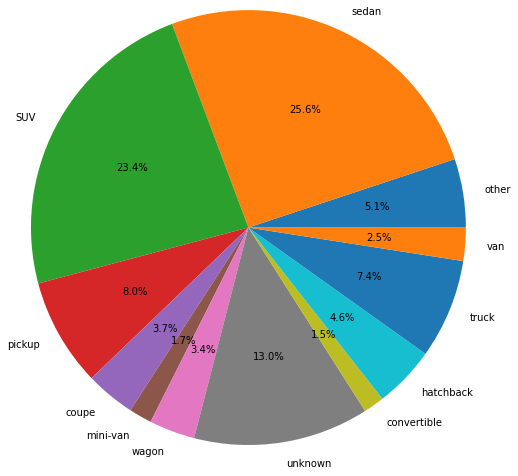

In [149]:
df = df.loc[((df['type']!= 'bus') & (df['type']!= 'offroad'))]
labels = df['type'].unique()
values = []
for label in labels:
    values.append(df.loc[df['type'] == label].shape[0])
plt.pie(values, labels = labels, shadow =False, radius = 2.5,autopct='%1.1f%%');

next lets see the manufacturer

In [150]:
manu = df.groupby(by = 'manufacturer')

In [151]:
manu.describe().price

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
acura,1084.0,14500.016605,9354.987046,1050.0,7995.00,12699.0,18990.00,130900.0
alfa-romeo,90.0,25668.833333,7118.592676,2500.0,24995.00,26787.5,28990.00,48995.0
aston-martin,10.0,67392.000000,38052.070325,30000.0,40848.75,54397.5,81966.75,149950.0
audi,1681.0,21749.025580,14182.382767,1500.0,12970.00,19510.0,27982.00,198900.0
bmw,3189.0,19243.212292,12421.962895,1300.0,9999.00,16500.0,25990.00,129900.0
buick,1407.0,12332.109453,8260.376134,1200.0,5999.00,10995.0,16353.00,129000.0
cadillac,1633.0,19562.217391,13814.671056,1400.0,9988.00,15999.0,25997.00,124981.0
chevrolet,14246.0,17866.318124,12987.805200,1100.0,8495.00,14795.0,23995.00,205000.0
chrysler,1842.0,11284.502714,8539.087912,1295.0,5594.25,8995.0,13997.25,73425.0


lets see the price distribution for the most common manufacturers

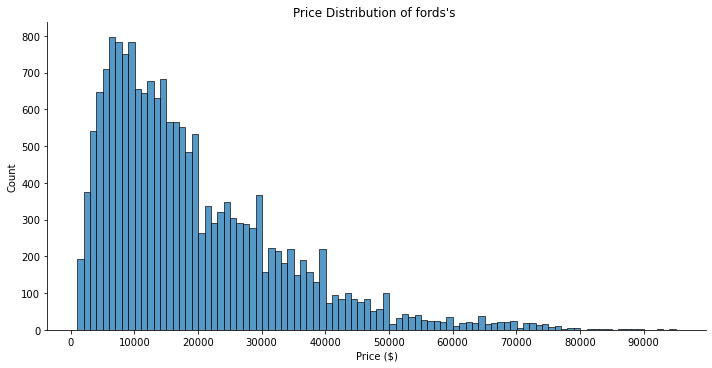

In [152]:
ford = df.loc[(df['manufacturer'] == 'ford') & (df['price'] < 100000)]
sns.displot(ford, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000, 10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of fords\'s ')
plt.show()

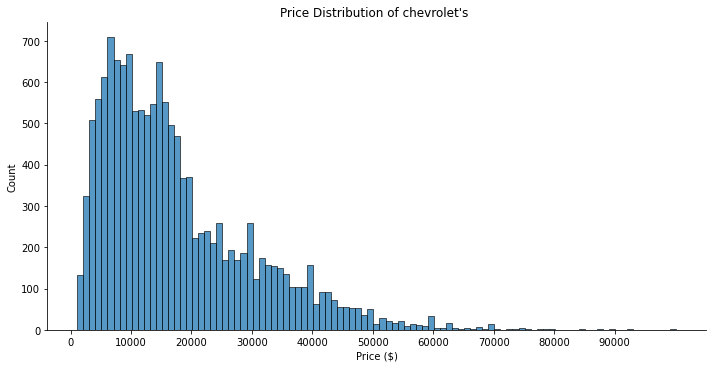

In [153]:
chevy = df.loc[(df['manufacturer'] == 'chevrolet') & (df['price'] < 100000)]
sns.displot(chevy, x='price', binwidth=1000, height=5, aspect=2)
plt.xticks(range(0,100000, 10000))
plt.xlabel('Price ($)')
plt.title('Price Distribution of chevrolet\'s ')
plt.show()

next lets check the outliers accoring to the odometer

In [154]:
df.odometer.max()

2043755555.0

In [155]:
df.loc[df['odometer'] == 2043755555]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
102814,16995,2005.0,gmc,sierra 2500hd,excellent,8 cylinders,diesel,2.043756e+09,clean,automatic,4wd,pickup,white


In [156]:
df = df.loc[df['odometer'] != 2043755555]

In [157]:
df.odometer.max()

123459789.0

In [158]:
df.loc[df['odometer'] == 123459789]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
48117,12995,2016.0,hyundai,veloster,excellent,4 cylinders,gas,123459789.0,clean,automatic,fwd,sedan,unknown


In [159]:
df = df.loc[df['odometer'] != 123459789.0]

In [160]:
df.odometer.max()

10000000.0

In [161]:
df.loc[df['odometer'] == 10000000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
90403,5600,1954.0,dodge,model c-1-b6,unknown,unknown,gas,10000000.0,missing,automatic,unknown,unknown,unknown


In [162]:
#that is somewhat reasonable as it is an old car and it comes to around 13440 miles a month

In [163]:
df.odometer.sort_values(ascending =False).head(10)

90403    10000000.0
57909     9999999.0
86104     7300000.0
84446     2500000.0
46874     2180020.0
2165      2075000.0
83155     1939810.0
83765     1885045.0
50177     1800000.0
54131     1800000.0
Name: odometer, dtype: float64

In [164]:
df.loc[df['odometer'] == 9999999]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
57909,11000,2008.0,ford,mustang gt,good,8 cylinders,gas,9999999.0,clean,manual,fwd,coupe,red


In [165]:
#this is around 64000 miles a month, which i tend to belivie is not accurate
df = df.loc[df['odometer'] != 9999999]

In [166]:
df.odometer.sort_values(ascending =False).head(10)

90403     10000000.0
86104      7300000.0
84446      2500000.0
46874      2180020.0
2165       2075000.0
83155      1939810.0
83765      1885045.0
50177      1800000.0
54131      1800000.0
110967     1795385.0
Name: odometer, dtype: float64

In [167]:
df.loc[df['odometer'] == 7300000.0]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
86104,12500,2006.0,ford,mustang gt roush,excellent,8 cylinders,gas,7300000.0,clean,manual,rwd,coupe,blue


In [168]:
#this comes to around 40500 miles a monthe which is also not probable
df = df.loc[df['odometer'] != 7300000]

In [169]:
df.odometer.sort_values(ascending =False).head(10)

90403     10000000.0
84446      2500000.0
46874      2180020.0
2165       2075000.0
83155      1939810.0
83765      1885045.0
50177      1800000.0
54131      1800000.0
110967     1795385.0
66230      1714665.0
Name: odometer, dtype: float64

In [170]:
df.loc[df['odometer'] == 2500000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
84446,2500,2000.0,gmc,sierra,fair,8 cylinders,gas,2500000.0,clean,automatic,4wd,pickup,black


In [100]:
#this makes sense as it is around 1000 miles a month

In [101]:
df.loc[df['odometer'] > 1000000]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
2165,3500,2011.0,ford,fiesta,excellent,4 cylinders,gas,2075000.0,clean,automatic,fwd,hatchback,grey
13799,5999,2010.0,mini,cooper,like new,4 cylinders,gas,1113702.0,clean,manual,unknown,unknown,unknown
15582,10000,1970.0,gmc,custom camper,good,8 cylinders,gas,1263932.0,clean,automatic,rwd,truck,white
19186,3500,2008.0,dodge,caliber,good,4 cylinders,gas,1123000.0,clean,automatic,fwd,hatchback,black
21379,6988,2013.0,hyundai,sonata,unknown,unknown,gas,1118674.0,clean,automatic,unknown,unknown,unknown
33911,7500,1995.0,ford,f150 xlt,good,6 cylinders,gas,1062450.0,clean,automatic,rwd,pickup,white
34114,6200,2001.0,porsche,boxster,good,6 cylinders,gas,1273400.0,clean,manual,rwd,convertible,black
42363,33500,2009.0,volvo,vt64t880,good,unknown,diesel,1004127.0,lien,automatic,unknown,other,red
42551,11600,2012.0,jeep,grand cherokee,good,unknown,gas,1237638.0,clean,other,unknown,SUV,black
44847,4750,2007.0,saturn,aura xe,excellent,6 cylinders,gas,1333828.0,clean,automatic,fwd,unknown,white


now lets see what we have in the title_status column

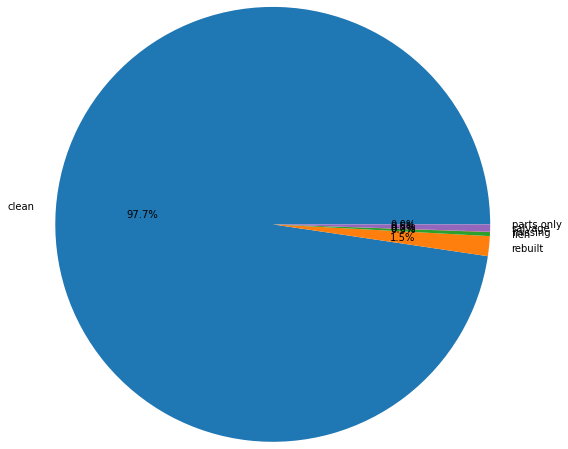

In [102]:
labels = df['title_status'].unique()
values = []
for label in labels:
    values.append(df.loc[df['title_status'] == label].shape[0])
plt.pie(values, labels = labels, shadow =False, radius = 2.5,autopct='%1.1f%%');

as we see, the big majority of the cars are clean, and there is no reason to keep this column, so we will drop it 

In [103]:
df = df.drop(columns  = 'title_status')

In [104]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other,unknown
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan,unknown
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,unknown,SUV,blue
3,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,other,unknown,pickup,red
4,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,other,rwd,coupe,blue


next lets check the gas types

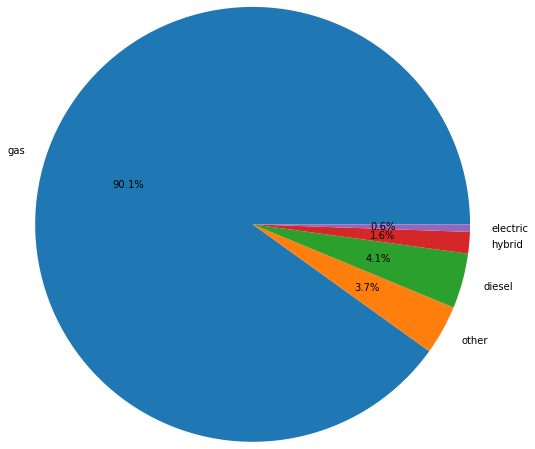

In [105]:
labels = df['fuel'].unique()
values = []
for label in labels:
    values.append(df.loc[df['fuel'] == label].shape[0])
plt.pie(values, labels = labels, shadow =False, radius = 2.5,autopct='%1.1f%%');

In [106]:
fuel = df.groupby('fuel')
fuel.describe().price

,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
diesel,4377.0,31993.854467,18910.127025,1100.0,15999.0,28788.0,44990.00,159999.0
electric,594.0,24793.803030,18965.389413,3500.0,10995.0,17449.5,36990.00,199996.0
gas,96410.0,16165.093828,12014.879331,1030.0,7850.0,13196.5,20999.00,249995.0
hybrid,1713.0,13783.742557,9747.885920,1200.0,7695.0,11350.0,16900.00,114970.0
other,3930.0,21881.976845,14215.158706,1175.0,11990.0,17971.0,28816.25,109900.0


as we see we have a big majority of gas cars, but the price changes drasticly according to the fuel type, so we will keep this column, lastly lets check the transmission, condition, cylinders and color columns

In [107]:
trans = df.groupby("transmission")
trans.describe().price

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,97210.0,16851.218866,12833.840741,1030.0,7990.00,13777.0,21990.0,249995.0
manual,4926.0,15215.324807,13626.891851,1050.0,6192.50,11489.5,19950.0,199996.0
other,4888.0,22461.407529,12483.264553,1175.0,13894.75,19993.0,28990.0,169995.0


as we see the majority of cars are automatic but while the price of these and manual cars is relativly close, the price of the other cars (CVT and Semi-automatic cars) is more, so we will leave this column as is 

In [108]:
color = df.groupby("paint_color")
color.describe().price

,count,mean,std,min,25%,50%,75%,max
paint_color,,,,,,,,
black,17783.0,18614.337907,13619.018305,1070.0,8995.0,14995.0,24900.0,225666.0
blue,8937.0,14876.392973,11590.858230,1100.0,6994.0,11900.0,18997.0,175500.0
brown,1487.0,14317.540013,11251.503571,1100.0,6392.5,10995.0,18990.0,113456.0
custom,2073.0,12916.359383,9829.186564,1200.0,6490.0,9995.0,15995.0,114900.0
green,1697.0,12060.947555,11898.312715,1195.0,4988.0,8395.0,14995.0,214995.0
grey,8714.0,15401.639890,11472.524630,1050.0,7495.0,12000.0,19900.0,129995.0
orange,512.0,18563.238281,16866.122524,1200.0,7995.0,14997.0,24522.5,169995.0
purple,199.0,13723.336683,12199.118303,1333.0,5497.5,9977.0,17647.5,74988.0
red,8315.0,16494.673963,13258.437725,1150.0,7750.0,12999.0,21499.0,235000.0


as most of the colors dont have a big difference in price, and also we have a lot of unknown, we will drop this column

In [109]:
df = df.drop(columns = 'paint_color')
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,unknown,SUV
3,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,other,unknown,pickup
4,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,other,rwd,coupe


In [110]:
condition = df.groupby("condition")
condition.describe().price

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,31950.0,14799.973646,11158.830943,1052.0,7257.50,11900.0,18750.00,204900.0
fair,719.0,4436.600834,7062.766124,1050.0,2000.00,3000.0,4800.00,123456.0
good,23841.0,15467.868420,11494.547377,1100.0,6789.00,12800.0,20990.00,154900.0
like new,4710.0,19082.631210,15331.831420,1200.0,9500.00,15500.0,24686.75,249911.0
new,328.0,25589.189024,20866.476358,1800.0,10900.00,20900.0,31872.00,198750.0
salvage,58.0,4267.500000,3086.836661,1100.0,2050.00,3100.0,5187.50,13500.0
unknown,45418.0,19364.801378,13923.624076,1030.0,9772.75,15995.0,25645.00,249995.0


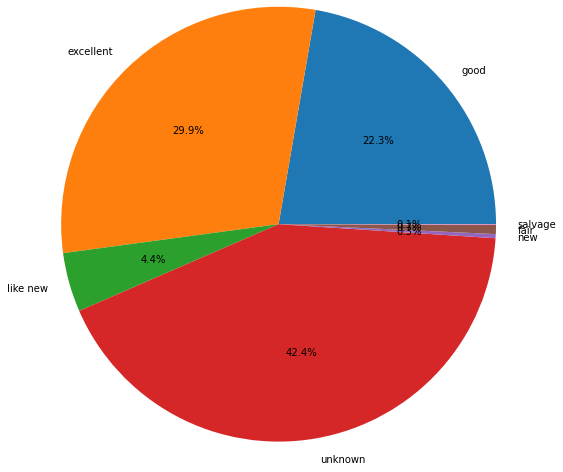

In [111]:
labels = df['condition'].unique()
values = []
for label in labels:
    values.append(df.loc[df['condition'] == label].shape[0])
plt.pie(values, labels = labels, shadow =False, radius = 2.5,autopct='%1.1f%%');

as a bit part of the condition of the cars is unknown, but also the condition changes the price, i will save 2 dataFrames, 1 with the condition columns and another without this column, so we can see the difference, and i will start encoding the categorial data

In [112]:
cylinders = df.groupby("cylinders")
cylinders.describe().price

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
10 cylinders,219.0,20372.073059,23696.922799,1500.0,8995.00,14710.0,22850.00,198900.0
12 cylinders,22.0,28895.272727,28128.520074,7700.0,13245.00,17247.5,34500.00,124995.0
3 cylinders,152.0,13651.960526,9337.660393,1900.0,6995.00,11997.0,17905.00,72991.0
4 cylinders,27508.0,11665.999273,7025.310216,1050.0,6550.00,9995.0,15298.25,139000.0
5 cylinders,548.0,7311.718978,4766.952773,1300.0,4495.00,6482.0,8550.00,49995.0
6 cylinders,25305.0,16249.498755,12135.248147,1050.0,6995.00,12999.0,22990.00,214995.0
8 cylinders,15898.0,23212.999056,16364.570090,1030.0,10995.00,19814.0,32800.00,235000.0
other,254.0,21383.586614,17187.048543,1550.0,9496.25,14999.0,27994.25,79995.0
unknown,37118.0,18996.076621,13383.295765,1077.0,9995.00,15900.0,24900.00,249995.0


ill try to maybe fill in some of the unknown cylinder rows by doing the following, looking at the unckown cylinder rows, try to match with the same model and year, and if there is only 1 other cylinder value, ill fill unknown with it, ill later do the same with type and drive

In [113]:
df.loc[df['cylinders'] == 'unknown']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
17,34990,2020.0,jeep,wrangler unlimited sport s,good,unknown,gas,17622.0,automatic,4wd,SUV
20,15998,2012.0,ford,f-150,excellent,unknown,gas,154878.0,automatic,unknown,pickup
21,7998,2013.0,dodge,grand caravan,excellent,unknown,gas,94325.0,automatic,fwd,mini-van
22,8998,2009.0,ford,flex,excellent,unknown,gas,148452.0,automatic,fwd,wagon
23,17998,2015.0,dodge,challenger,excellent,unknown,gas,91661.0,automatic,rwd,coupe
...,...,...,...,...,...,...,...,...,...,...,...
122468,5577,2007.0,honda,cr-v,excellent,unknown,gas,225228.0,automatic,4wd,SUV
122469,4977,2009.0,mitsubishi,lancer,excellent,unknown,gas,97799.0,automatic,fwd,unknown
122470,9877,2010.0,subaru,forester,excellent,unknown,gas,117933.0,automatic,4wd,SUV
122471,5277,2007.0,mazda,6,excellent,unknown,gas,122222.0,manual,fwd,unknown


In [114]:
check = df.loc[df['model'] == "focus"]
check.loc[check['year'] == 2016].cylinders.unique()

array(['unknown', '4 cylinders', '3 cylinders'], dtype=object)

In [312]:
df.loc[((df['model'] == "sierra 3500hd") & (df['year'] == 2016)),"cylinders" ] = "8 cylinders"

In [115]:
df.loc[df['drive'] == 'unknown'].head(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,unknown,SUV
3,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,other,unknown,pickup
9,24990,2016.0,ram,1500 crew cab slt pickup 4d,good,6 cylinders,other,57926.0,other,unknown,pickup
11,32990,2019.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,6910.0,other,unknown,pickup
13,28990,2018.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,17117.0,other,unknown,pickup
20,15998,2012.0,ford,f-150,excellent,unknown,gas,154878.0,automatic,unknown,pickup
28,29988,2019.0,lexus,nx 300 f sport,excellent,4 cylinders,gas,18022.0,automatic,unknown,SUV
29,15988,2016.0,honda,civic lx,excellent,4 cylinders,gas,35860.0,automatic,unknown,sedan
30,20488,2014.0,mercedes-benz,cla 250,excellent,4 cylinders,gas,46313.0,automatic,unknown,sedan
33,33990,2016.0,ford,f150 supercrew cab xlt,good,8 cylinders,gas,18175.0,automatic,unknown,pickup


In [116]:
check = df.loc[df['model'] == "f150 regular cab xl pickup"]
check.loc[check['year'] == 2019].drive.unique()

array(['unknown'], dtype=object)

In [331]:
df.loc[((df['model'] == "civic lx") & (df['year'] == 2016)),"drive" ] = "fwd"

after trying to do it for the cylinders and drive columns, i saw that either most of the cars had more the 1 option for the cylinders, and for the drive column, if 1 car was unknown the others were too

In [337]:
df.loc[df['type'] == 'unknown'].head(20)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
25,12998,2015.0,ford,transit connect cargo,excellent,4 cylinders,gas,112974.0,automatic,fwd,unknown
69,23995,2015.0,toyota,tacoma prerunner,unknown,unknown,gas,38532.0,automatic,unknown,unknown
81,39500,2016.0,chevrolet,silverado 1500,unknown,unknown,gas,22331.0,automatic,4wd,unknown
82,30900,2019.0,ford,f-150,unknown,unknown,gas,41323.0,automatic,rwd,unknown
83,17900,2020.0,toyota,corolla,unknown,4 cylinders,gas,40022.0,automatic,fwd,unknown
84,15998,2019.0,toyota,corolla,unknown,4 cylinders,gas,40283.0,automatic,fwd,unknown
85,9477,2012.0,toyota,camry,unknown,unknown,gas,97927.0,automatic,fwd,unknown
86,24977,2018.0,dodge,charger,unknown,unknown,gas,22371.0,automatic,rwd,unknown
92,27500,2016.0,dodge,grand caravan se,unknown,6 cylinders,gas,32753.0,automatic,unknown,unknown
99,27990,2013.0,chevrolet,silverado 3500hd,good,8 cylinders,gas,103725.0,automatic,4wd,unknown


In [117]:
check = df.loc[df['model'] == "murano"]
check.loc[check['year'] == 2019].type.unique()

array(['unknown', 'wagon', 'hatchback', 'SUV'], dtype=object)

In [360]:
df.loc[((df['model'] == "super duty f-550 drw") & (df['year'] == 2011)),"type" ] = "pickup"

after trying with type as well, i deem unefficient

In [118]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [119]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type
0,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,other,rwd,other
1,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,automatic,fwd,sedan
2,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,automatic,unknown,SUV
3,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,other,unknown,pickup
4,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,other,rwd,coupe


In [120]:
len(df.model.unique())

13511

as we see we have a lot of unieue models and there is no way we can dumb it down to numerical numbers, so i will remove this column

In [121]:
df = df.drop(columns = 'model')

In [122]:
print(df.condition.unique())
print(df.fuel.unique())
print(df.cylinders.unique())
print(df.transmission.unique())
print(df.type.unique())
print(df.drive.unique())

['good' 'excellent' 'like new' 'unknown' 'new' 'fair' 'salvage']
['gas' 'other' 'diesel' 'hybrid' 'electric']
['8 cylinders' '4 cylinders' '6 cylinders' 'unknown' '10 cylinders'
 '5 cylinders' 'other' '3 cylinders' '12 cylinders']
['other' 'automatic' 'manual']
['other' 'sedan' 'SUV' 'pickup' 'coupe' 'mini-van' 'wagon' 'unknown'
 'convertible' 'hatchback' 'truck' 'van']
['rwd' 'fwd' 'unknown' '4wd']


In [123]:
df = pd.get_dummies(df,columns  = ['condition','fuel','cylinders','drive','type','transmission'])

In [125]:
df.head()

,price,year,manufacturer,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,chevrolet,32742.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,hyundai,93600.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,bmw,87046.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,toyota,33290.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,ford,9692.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [126]:

df_without_C = df.copy()
df_without_C = df_without_C.drop(columns = ['condition_fair',"condition_good",'condition_new','condition_like new','condition_salvage','condition_excellent'])

In [127]:
df_without_C.head()

,price,year,manufacturer,odometer,condition_unknown,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,chevrolet,32742.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,hyundai,93600.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,bmw,87046.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,toyota,33290.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,ford,9692.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [129]:
df_without_C = df_without_C.drop(columns = "condition_unknown")

In [130]:
len(df.manufacturer.unique())

42

In [131]:
manu = df.groupby("manufacturer")
manu.describe().price

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
acura,1084.0,14500.016605,9354.987046,1050.0,7995.00,12699.0,18990.00,130900.0
alfa-romeo,90.0,25668.833333,7118.592676,2500.0,24995.00,26787.5,28990.00,48995.0
aston-martin,10.0,67392.000000,38052.070325,30000.0,40848.75,54397.5,81966.75,149950.0
audi,1681.0,21749.025580,14182.382767,1500.0,12970.00,19510.0,27982.00,198900.0
bmw,3189.0,19243.212292,12421.962895,1300.0,9999.00,16500.0,25990.00,129900.0
buick,1407.0,12332.109453,8260.376134,1200.0,5999.00,10995.0,16353.00,129000.0
cadillac,1633.0,19562.217391,13814.671056,1400.0,9988.00,15999.0,25997.00,124981.0
chevrolet,14246.0,17866.318124,12987.805200,1100.0,8495.00,14795.0,23995.00,205000.0
chrysler,1842.0,11284.502714,8539.087912,1295.0,5594.25,8995.0,13997.25,73425.0


In [132]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True)

In [133]:
try_df = df.copy()

In [134]:
try_df.head()

,price,year,manufacturer,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,chevrolet,32742.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,hyundai,93600.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,bmw,87046.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,toyota,33290.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,ford,9692.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


it is hard to encode and manufacturer columns with either one hot encoder, and i dont want to create 42 more columns for the dummie variables, so i will use binary encoding

In [135]:
import category_encoders as ce

In [136]:
encoder= ce.BinaryEncoder(cols=['manufacturer'],return_df=True)

In [137]:
try_df_new = encoder.fit_transform(try_df)

D:\anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [138]:
try_df_new.head()

,price,year,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,odometer,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,0,0,0,0,0,0,1,32742.0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,0,0,0,0,0,1,0,93600.0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,0,0,0,0,0,1,1,87046.0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,0,0,0,0,1,0,0,33290.0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,0,0,0,0,1,0,1,9692.0,...,0,0,0,0,0,0,0,0,0,1


now lets do it on our actual dataframe

In [139]:
df = encoder.fit_transform(df)
df.head()

D:\anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,price,year,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,odometer,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,0,0,0,0,0,0,1,32742.0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,0,0,0,0,0,1,0,93600.0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,0,0,0,0,0,1,1,87046.0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,0,0,0,0,1,0,0,33290.0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,0,0,0,0,1,0,1,9692.0,...,0,0,0,0,0,0,0,0,0,1


i chose to work with the random forests model for regression

In [140]:
price = df['price']

In [141]:
price.head()

0    35990
1     7500
2     4900
3    29590
4    39990
Name: price, dtype: int64

In [142]:
df = df.drop(columns = ['price'])

In [143]:
df.head()

,year,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,odometer,condition_excellent,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,2010.0,0,0,0,0,0,0,1,32742.0,0,...,1,0,0,0,0,0,0,0,0,1
1,2014.0,0,0,0,0,0,1,0,93600.0,1,...,0,0,1,0,0,0,0,1,0,0
2,2006.0,0,0,0,0,0,1,1,87046.0,0,...,0,0,0,0,0,0,0,1,0,0
3,2016.0,0,0,0,0,1,0,0,33290.0,0,...,0,1,0,0,0,0,0,0,0,1
4,2012.0,0,0,0,0,1,0,1,9692.0,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
save_df = df.copy()
data = df.to_numpy()

In [145]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import time

In [146]:
Data_train, Data_test, Target_train, Target_test = train_test_split( data, price, test_size=0.1, random_state=0)

we need to scale cause we have a lot of zeros and ones, but also year which is in thousends and also odometer which can 
be in hunderd thousends

In [147]:

sc = StandardScaler()
Data_train_scaled = sc.fit_transform(Data_train)
Data_test_scaled = sc.transform(Data_test)

In [148]:
start = time.time()
RFR = RandomForestRegressor(n_estimators = 500,max_depth = 25,random_state=0)
RFR.fit(Data_train_scaled,Target_train)
pred = RFR.predict(Data_test_scaled)
end = time.time()

In [149]:
print(RFR.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))
print(end-start)

0.8049372978318627
Mean Absolute Error: 3354.554404479359
Mean Squared Error: 33447958.43214789
Root Mean Squared Error: 5783.420997311876
349.4538643360138


In [150]:
start = time.time()
RFR = RandomForestRegressor(n_estimators = 200,max_depth = 25,random_state=0)
RFR.fit(Data_train_scaled,Target_train)
pred = RFR.predict(Data_test_scaled)
end = time.time()

In [151]:
print(RFR.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))
print(end-start)

0.8041354986885456
Mean Absolute Error: 3359.389059612181
Mean Squared Error: 33585445.2203371
Root Mean Squared Error: 5795.295093464792
142.24625515937805


In [152]:
from sklearn.dummy import DummyRegressor

lets set some dummy regressors to see if our reggressor is worth something

In [157]:
dummy_1 = DummyRegressor(strategy="mean")
dummy_1.fit(Data_train_scaled, Target_train)
pred_dummy = dummy_1.predict(Data_test_scaled)

In [158]:
print(dummy_1.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred_dummy))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred_dummy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred_dummy)))

-1.333595934838172e-05
Mean Absolute Error: 9388.940978684275
Mean Squared Error: 171475141.690237
Root Mean Squared Error: 13094.85172463732


In [159]:
dummy_2 = DummyRegressor(strategy="median")
dummy_2.fit(Data_train_scaled, Target_train)
pred_dummy = dummy_2.predict(Data_test_scaled)

In [160]:
print(dummy_2.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred_dummy))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred_dummy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred_dummy)))

-0.05623166097344767
Mean Absolute Error: 9022.497430626927
Mean Squared Error: 181115058.38008034
Root Mean Squared Error: 13457.8994787478


In [161]:
dummy_3 = DummyRegressor(strategy="quantile",quantile = 0.4)
dummy_3.fit(Data_train_scaled, Target_train)
pred_dummy = dummy_3.predict(Data_test_scaled)

In [162]:
print(dummy_3.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred_dummy))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred_dummy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred_dummy)))

-0.21531152561742006
Mean Absolute Error: 9353.013080444734
Mean Squared Error: 208392936.93328974
Root Mean Squared Error: 14435.821311352178


as we can see, our model has around 8000-9000 less RMSE score which is very good, lets try to see if we can improve our model a bit more

In [165]:
start = time.time()
RFR = RandomForestRegressor(n_estimators = 500,max_depth = 50,random_state=0)
RFR.fit(Data_train_scaled,Target_train)
pred = RFR.predict(Data_test_scaled)
end = time.time()


In [166]:
print(RFR.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))
print(end-start)

0.8027113083382263
Mean Absolute Error: 3375.4046220882965
Mean Squared Error: 33829655.20567752
Root Mean Squared Error: 5816.326607548575
358.6305422782898


as we see, if we go up with n_estimators and max depth, we get around the same scores, but it take longer to compute, so we will use n_estimators = 200 and max_depth = 25

In [167]:
RFR = RandomForestRegressor(n_estimators = 200,max_depth = 25,random_state=0)
RFR.fit(Data_train_scaled,Target_train)
pred = RFR.predict(Data_test_scaled)

In [168]:
print(RFR.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))

0.8041354986885456
Mean Absolute Error: 3359.389059612181
Mean Squared Error: 33585445.2203371
Root Mean Squared Error: 5795.295093464792


now lets do the same thing but for the dataFrame without the condition column

In [171]:
encoder= ce.BinaryEncoder(cols=['manufacturer'],return_df=True)
df_without_C.head()

,price,year,manufacturer,odometer,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,cylinders_10 cylinders,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,chevrolet,32742.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,hyundai,93600.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,bmw,87046.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,toyota,33290.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,ford,9692.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [173]:
df_without_C = encoder.fit_transform(df_without_C)

D:\anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [174]:
df_without_C.head()

,price,year,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,odometer,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,35990,2010.0,0,0,0,0,0,0,1,32742.0,...,1,0,0,0,0,0,0,0,0,1
1,7500,2014.0,0,0,0,0,0,1,0,93600.0,...,0,0,1,0,0,0,0,1,0,0
2,4900,2006.0,0,0,0,0,0,1,1,87046.0,...,0,0,0,0,0,0,0,1,0,0
3,29590,2016.0,0,0,0,0,1,0,0,33290.0,...,0,1,0,0,0,0,0,0,0,1
4,39990,2012.0,0,0,0,0,1,0,1,9692.0,...,0,0,0,0,0,0,0,0,0,1


In [183]:
price = df_without_C['price']
df_without_C = df_without_C.drop(columns = 'price')

In [184]:
data_n = df_without_C.to_numpy()

In [185]:
df.head()

,year,manufacturer_0,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,manufacturer_6,odometer,condition_excellent,...,type_other,type_pickup,type_sedan,type_truck,type_unknown,type_van,type_wagon,transmission_automatic,transmission_manual,transmission_other
0,2010.0,0,0,0,0,0,0,1,32742.0,0,...,1,0,0,0,0,0,0,0,0,1
1,2014.0,0,0,0,0,0,1,0,93600.0,1,...,0,0,1,0,0,0,0,1,0,0
2,2006.0,0,0,0,0,0,1,1,87046.0,0,...,0,0,0,0,0,0,0,1,0,0
3,2016.0,0,0,0,0,1,0,0,33290.0,0,...,0,1,0,0,0,0,0,0,0,1
4,2012.0,0,0,0,0,1,0,1,9692.0,0,...,0,0,0,0,0,0,0,0,0,1


above we set data_n to be the data without the condition column

In [206]:
Data_train, Data_test, Target_train, Target_test = train_test_split( data_n, price, test_size=0.1, random_state=0)

In [207]:
sc = StandardScaler()
Data_train_scaled = sc.fit_transform(Data_train)
Data_test_scaled = sc.transform(Data_test)

In [197]:
start = time.time()
RFR = RandomForestRegressor(n_estimators = 200,max_depth = 25,random_state=0)
RFR.fit(Data_train_scaled,Target_train)
pred = RFR.predict(Data_test_scaled)
end = time.time()

In [198]:
print(RFR.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))
print(end-start)

0.7967731686554915
Mean Absolute Error: 3405.7100122076877
Mean Squared Error: 32967612.035477545
Root Mean Squared Error: 5741.742944043868
125.38148832321167


as we see, without the condition column, our RMSE score is actually a bit better, but R2 score and  MAE drop, so we will use the last regressor we defined but with the condition column

(RFR = RandomForestRegressor(n_estimators = 200,max_depth = 25,random_state=0))

for my second model i will choose the knearestRegressor, i wanted to use the linear regresion but it means getting a function with around 40 parameters

In [199]:
from sklearn.neighbors import KNeighborsRegressor

In [208]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(Data_train_scaled,Target_train)
pred = knn.predict(Data_test_scaled)

In [209]:
print(knn.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))

0.5932664931730818
Mean Absolute Error: 4893.523371017472
Mean Squared Error: 69743755.6134231
Root Mean Squared Error: 8351.272694231886


lets add back the condition columns and see what we get

In [210]:
Data_train, Data_test, Target_train, Target_test = train_test_split(data, price, test_size=0.1, random_state=0)

In [211]:
sc = StandardScaler()
Data_train_scaled = sc.fit_transform(Data_train)
Data_test_scaled = sc.transform(Data_test)

In [212]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(Data_train_scaled,Target_train)
pred = knn.predict(Data_test_scaled)

In [213]:
print(knn.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))

0.5645025527663415
Mean Absolute Error: 5246.661390264411
Mean Squared Error: 74675990.59415323
Root Mean Squared Error: 8641.52709850251


as we see with the condition column, the knn regresseor actually gives worst results then without the column, with a RMSE score of almost 300 more!

in conclusion, the best reggressor we found was the random forset regressor, with the condition column, and n_estimaotrs of 200 and max_depth of 25

In [214]:
RFR = RandomForestRegressor(n_estimators = 200,max_depth = 25,random_state=0)
RFR.fit(Data_train_scaled,Target_train)
pred = RFR.predict(Data_test_scaled)

In [215]:
print(RFR.score(Data_test_scaled,Target_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(Target_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Target_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_test, pred)))

0.8041354986885456
Mean Absolute Error: 3359.389059612181
Mean Squared Error: 33585445.2203371
Root Mean Squared Error: 5795.295093464792
